## Model Generation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from scipy import stats

c:\Users\jeanb\projets\machine-learning-intiation\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('ressources/datasets/salary_prediction_data_clean.csv')
print(df.head())

   Experience       Age  Education_High School  Education_Master  \
0    0.250000  0.977273                      1                 0   
1    0.357143  0.886364                      0                 0   
2    0.964286  0.931818                      0                 0   
3    1.000000  0.568182                      1                 0   
4    0.857143  0.136364                      0                 0   

   Education_PhD  Location_Suburban  Location_Urban  Job_Title_Director  \
0              0                  0               1                   0   
1              1                  1               0                   1   
2              0                  1               0                   0   
3              0                  0               0                   1   
4              1                  0               1                   0   

   Job_Title_Engineer  Job_Title_Manager  Gender_Male         Salary  
0                   0                  1            1   84620.053665 

In [3]:
df.describe()

,Experience,Age,Education_High School,Education_Master,Education_PhD,Location_Suburban,Location_Urban,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Male,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.491821,0.508568,0.255000,0.241000,0.251000,0.345000,0.310000,0.275000,0.229000,0.241000,0.516000,105558.404239
std,0.297897,0.309305,0.436079,0.427904,0.433805,0.475606,0.462725,0.446738,0.420399,0.427904,0.499994,28256.972075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33510.510669
25%,0.214286,0.227273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85032.141517
50%,0.500000,0.522727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,104314.518315
75%,0.750000,0.795455,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,126804.047524
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193016.602150


In [4]:
X = df.drop('Salary', axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

y_pred = lreg.predict(x_test)

### Evaluation du Model

In [6]:
mse = mean_squared_error(y_test, y_pred)
mrse = sqrt(mse)

print(f"MSE : {mse}\nRMSE : {mrse}")

accuracy = r2_score(y_test, y_pred)
print(f"R2 : {round(accuracy * 100, 2)}%")

MSE : 105996277.66096848
RMSE : 10295.44936663614
R2 : 87.02%


L'erreur quadratique moyenne est de 105996277 (MRSE: 10295.4)
Les prédictions de salaires sont donc à 10295.4 des valeurs réelles.

Coefficient de détermination du model : 87.02%

In [7]:
coefficients = pd.DataFrame(lreg.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values('Coefficient', ascending=False).round(2)
coefficients_linear = dict(zip(X.columns, lreg.coef_))

display(coefficients)

,Coefficient
Education_PhD,40306.36
Experience,28060.99
Job_Title_Director,25106.58
Education_Master,21105.77
Job_Title_Manager,15284.96
Location_Urban,9920.74
Location_Suburban,4839.29
Job_Title_Engineer,3979.18
Gender_Male,503.42
Age,440.21


### Réduction de dimension

#### Selection de caractéristiques K-Best

In [8]:
selector = SelectKBest(f_classif, k=11)
X_new = selector.fit_transform(X, y)

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)   

lreg_new = LinearRegression()
lreg_new.fit(x_train_new, y_train_new)
y_pred_new = lreg_new.predict(x_test_new)

mse_new = mean_squared_error(y_test_new, y_pred_new)
mrse_new = sqrt(mse_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"MSE : {mse_new}\nRMSE : {mrse_new}\nR2 : {round(r2_new * 100, 2)}%")

MSE : 105996277.66096848
RMSE : 10295.44936663614
R2 : 87.02%


c:\Users\jeanb\projets\machine-learning-intiation\env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


pas d'amélioration notable

In [9]:
X_0 = X.drop(['Age'], axis=1)
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(X_0, y, test_size=0.2, random_state=42)
lreg_0 = LinearRegression()
lreg_0.fit(x_train_0, y_train_0)
y_pred_0 = lreg_0.predict(x_test_0)

mse_0 = mean_squared_error(y_test_0, y_pred_0)
mrse_0 = sqrt(mse_0)
r2_0 = r2_score(y_test_0, y_pred_0)
print(f"MSE : {mse_0}\nRMSE : {mrse_0}\nR2 : {round(r2_0 * 100, 2)}%")

MSE : 105640152.52819301
RMSE : 10278.139546055649
R2 : 87.06%


En supprimant la variable 'Age' on améliore très légèrement le coeff de détermination à 87.96%

Idee pour la suite :

    - Utiliser des Modèles Plus Complexes :
    Essayez des modèles plus complexes comme la régression polynomiale, la régression Ridge, la régression Lasso, ou des modèles non linéaires comme les forêts aléatoires ou les réseaux de neurones.
    
    - Validation Croisée :
    Utilisez la validation croisée pour évaluer la performance de votre modèle et éviter le surapprentissage.

### Lasso & Ridge Regression

In [48]:
lreg_lasso = Lasso(alpha=0.1, fit_intercept=True)
lreg_lasso.fit(x_train, y_train)
y_pred_lasso = lreg_lasso.predict(x_test)

mrse_lasso = sqrt(mean_squared_error(y_test,y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print ("Lasso validation MRSE is", mrse_lasso)
print (f"Lasso validation R2 is {r2_lasso}")

coefficient_lasso = dict(zip(X.columns, lreg_lasso.coef_))

Lasso validation MRSE is 10295.41702010152
Lasso validation R2 is 0.8701871838639845


In [49]:
lreg_ridge = Ridge(alpha=0.65, fit_intercept=True)
lreg_ridge.fit(x_train, y_train)
y_pred_ridge = lreg_ridge.predict(x_test)

mrse_ridge = sqrt(mean_squared_error(y_test,y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print ("Ridge validation MRSE is", mrse_ridge)
print (f"Ridge validation R2 is {r2_ridge}")

coefficient_ridge = dict(zip(X.columns, lreg_ridge.coef_))

Ridge validation MRSE is 10301.20430154407
Ridge validation R2 is 0.8700412015397689


In [12]:
print(f"coefficients_linear : {coefficients_linear}")
print(f"coefficient_lasso : {coefficient_lasso}")
print(f"coefficient_ridge : {coefficient_ridge}")

coefficients_linear : {'Experience': np.float64(28060.987790084793), 'Age': np.float64(440.21001532132505), 'Education_High School': np.float64(-18194.08107071969), 'Education_Master': np.float64(21105.767850124546), 'Education_PhD': np.float64(40306.35692247886), 'Location_Suburban': np.float64(4839.288704243625), 'Location_Urban': np.float64(9920.736220517498), 'Job_Title_Director': np.float64(25106.575031171353), 'Job_Title_Engineer': np.float64(3979.1800910539278), 'Job_Title_Manager': np.float64(15284.961081072874), 'Gender_Male': np.float64(503.42204044617984)}
coefficient_lasso : {'Experience': np.float64(28060.14445125464), 'Age': np.float64(439.10621664199994), 'Education_High School': np.float64(-18194.03717092386), 'Education_Master': np.float64(21104.884314148254), 'Education_PhD': np.float64(40305.479899347556), 'Location_Suburban': np.float64(4838.561687950822), 'Location_Urban': np.float64(9919.931121085763), 'Job_Title_Director': np.float64(25105.145736968687), 'Job_Tit

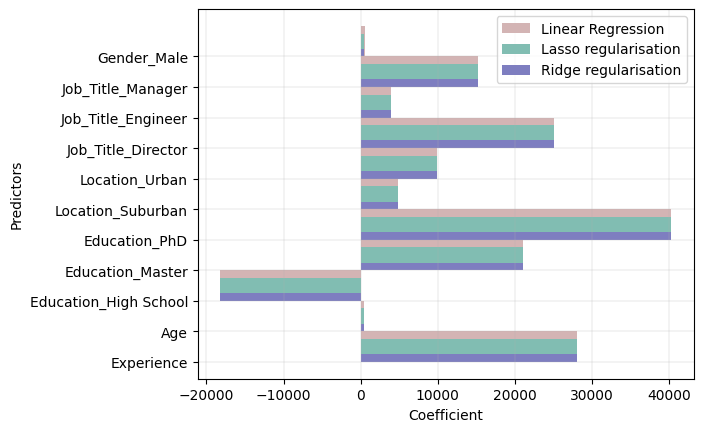

In [13]:
lreg_x = list(coefficients_linear.keys())
lreg_y = list(coefficients_linear.values())

lasso_x = list(coefficient_lasso.keys())
lasso_y = list(coefficient_lasso.values())

ridge_x = list(coefficient_ridge.keys())
ridge_y = list(coefficient_ridge.values())

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.show()

In [14]:
poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(x_train_0)
x_poly_test = poly.fit_transform(x_test_0)

polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(X_poly_train, y_train_0)
y_poly_pred = polymodel.predict(x_poly_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
mrse_poly = sqrt(mse_poly)
r2_poly = r2_score(y_test_0, y_poly_pred)

print(f"MSE : {mse_poly}\nRMSE : {mrse_poly}\nR2 : {round(r2_poly * 100, 2)}%")


MSE : 105640152.52819347
RMSE : 10278.13954605567
R2 : 87.06%


In [32]:
alphas = [0.1, 0.25, 0.5 , 0.65, 0.651, 0.66, 0.67, 0.7, 0.75, 0.8]
training_error, validation_error = {},{}

for alpha in alphas:
    reg_ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge_cv = cross_validate(reg_ridge, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

    mse_train = -np.mean(ridge_cv['train_score'])
    training_error[alpha] = mse_train

    mse_val = -np.mean(ridge_cv['test_score'])
    validation_error[alpha] = mse_val

best_alpha = min(validation_error, key=validation_error.get)
print(best_alpha)


0.65


In [61]:
# Modèle de régression linéaire simple
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2 pour la régression linéaire simple : {r2}")
print(f"MSE pour la régression linéaire simple : {mse}")

# Régression polynomiale
poly = PolynomialFeatures(degree=1)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lreg_poly = LinearRegression()
lreg_poly.fit(x_train_poly, y_train)
y_pred_poly = lreg_poly.predict(x_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"R^2 pour la régression polynomiale : {r2_poly}")
print(f"MSE pour la régression polynomiale : {mse_poly}")

# Régression Ridge
ridge = Ridge(alpha=0.65)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"R^2 pour la régression Ridge : {r2_ridge}")
print(f"MSE pour la régression Ridge : {mse_ridge}")

# Régression Lasso
lasso = Lasso(alpha=0.65)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"R^2 pour la régression Lasso : {r2_lasso}")
print(f"MSE pour la régression Lasso : {mse_lasso}")

# Validation croisée pour évaluer la performance des modèles
scores = cross_val_score(lreg, X, y, cv=6, scoring='r2')
print(f"R^2 moyen pour la régression linéaire avec validation croisée : {scores.mean()}")

R^2 pour la régression linéaire simple : 0.8701863681609705
MSE pour la régression linéaire simple : 105996277.66096848
R^2 pour la régression polynomiale : 0.8701863681609703
MSE pour la régression polynomiale : 105996277.66096859
R^2 pour la régression Ridge : 0.8700412015397689
MSE pour la régression Ridge : 106114810.06215006
R^2 pour la régression Lasso : 0.8701915654848403
MSE pour la régression Lasso : 105992033.90801123
R^2 moyen pour la régression linéaire avec validation croisée : 0.8700403321880744


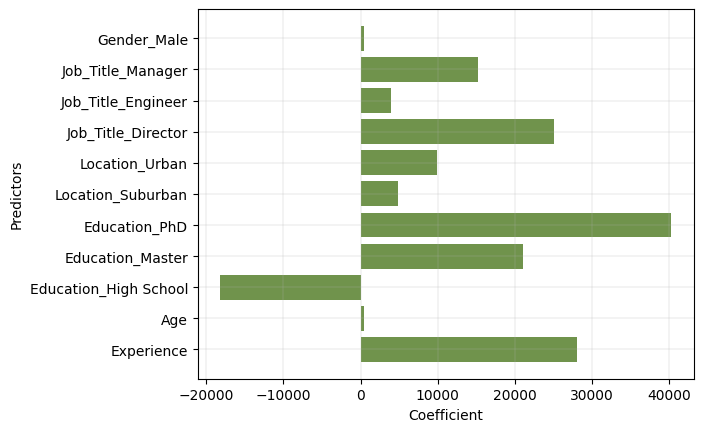

In [ ]:
fig, ax = plt.subplots()
ax.barh(coefficients_linear.keys(), coefficients_linear.values(), color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
plt.show()

In [78]:
constante = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:                  Salary   R-squared (uncentered):                   0.967
Model:                             OLS   Adj. R-squared (uncentered):              0.967
Method:                  Least Squares   F-statistic:                              2634.
Date:              sam., 22 févr. 2025   Prob (F-statistic):                        0.00
Time:                         12:31:55   Log-Likelihood:                         -11315.
No. Observations:                 1000   AIC:                                  2.265e+04
Df Residuals:                      989   BIC:                                  2.271e+04
Df Model:                           11                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [87]:
model.pvalues

Experience               3.801088e-110
Age                       4.580355e-30
Education_High School     6.143400e-01
Education_Master          5.217535e-96
Education_PhD            3.489177e-175
Location_Suburban         7.498453e-21
Location_Urban            1.493175e-34
Job_Title_Director       3.430706e-115
Job_Title_Engineer        1.320628e-35
Job_Title_Manager         4.840470e-77
Gender_Male               1.572294e-15
dtype: float64

In [102]:
conf = 1 - model.pvalues
print(conf)

Experience               1.00000
Age                      1.00000
Education_High School    0.38566
Education_Master         1.00000
Education_PhD            1.00000
Location_Suburban        1.00000
Location_Urban           1.00000
Job_Title_Director       1.00000
Job_Title_Engineer       1.00000
Job_Title_Manager        1.00000
Gender_Male              1.00000
dtype: float64


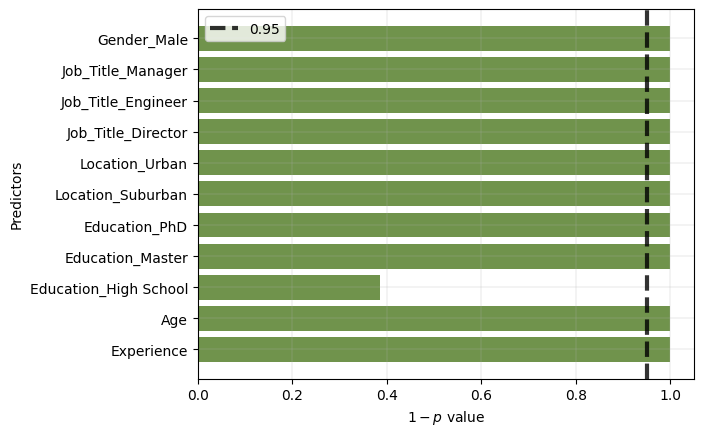

In [105]:
fig, ax = plt.subplots()
ax.barh(X.columns, conf, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.axvline(x=0.95, linewidth=3, linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show()

#### et si on retire Education High School ?

In [125]:
df_t = df.drop('Education_High School', axis=1)
X_t = df_t.drop('Salary', axis=1)
y_t = df_t['Salary']

x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)
lreg_t = LinearRegression()
lreg_t.fit(x_train_t, y_train_t)
y_pred_t = lreg_t.predict(x_test_t)

r2 = r2_score(y_test_t, y_pred_t)
print(f"R2 : {r2}")

scores = cross_val_score(lreg_t, X_t, y_t, cv=6, scoring='r2')
print(f"R^2 moyen pour la régression linéaire avec validation croisée : {scores.mean()}")

R2 : 0.8160521186809635
R^2 moyen pour la régression linéaire avec validation croisée : 0.8168689957189393
